# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import json
from pprint import pprint
import csv
import pytemperature

#set variable called now from datetime library
now = datetime.datetime.now()
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [76]:
#define the url and empty lists for dataframe needed
url = "http://api.openweathermap.org/data/2.5/weather?q="
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []
#run loop and count through cities 
for count, city in enumerate(cities, start=1):
    query_url = url + city + "&APPID=" + api_key
    print(f'Processing Record {count} of Set 1 | {city}')
    response = requests.get(query_url).json()
    if response['cod'] != 200:
       print(f'City not found. Skipping...')
    else:
        pprint(query_url)
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(pytemperature.k2f(response['main']['temp_max']))
        Wind_Speed.append(response['wind']['speed'])
       

Processing Record 1 of Set 1 | merced
'http://api.openweathermap.org/data/2.5/weather?q=merced&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 2 of Set 1 | hovd
'http://api.openweathermap.org/data/2.5/weather?q=hovd&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 3 of Set 1 | vestmannaeyjar
'http://api.openweathermap.org/data/2.5/weather?q=vestmannaeyjar&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 4 of Set 1 | qaanaaq
'http://api.openweathermap.org/data/2.5/weather?q=qaanaaq&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 5 of Set 1 | rikitea
'http://api.openweathermap.org/data/2.5/weather?q=rikitea&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 6 of Set 1 | port lincoln
('http://api.openweathermap.org/data/2.5/weather?q=port '
 'lincoln&APPID=cea64c0a189ef8d1d857d59ebe03daaf')
Processing Record 7 of Set 1 | jamestown
'http://api.openweathermap.org/data/2.5/weather?q=jamestown&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Reco

'http://api.openweathermap.org/data/2.5/weather?q=ihosy&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 65 of Set 1 | namibe
'http://api.openweathermap.org/data/2.5/weather?q=namibe&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 66 of Set 1 | ilulissat
'http://api.openweathermap.org/data/2.5/weather?q=ilulissat&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 67 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 68 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 69 of Set 1 | port alfred
('http://api.openweathermap.org/data/2.5/weather?q=port '
 'alfred&APPID=cea64c0a189ef8d1d857d59ebe03daaf')
Processing Record 70 of Set 1 | northam
'http://api.openweathermap.org/data/2.5/weather?q=northam&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 71 of Set 1 | mataura
'http://api.openweathermap.org/data/2.5/weather?q=mataura&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 72 of Set 1 | dembi dolo
('http://a

'http://api.openweathermap.org/data/2.5/weather?q=ucluelet&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 128 of Set 1 | kosovska mitrovica
City not found. Skipping...
Processing Record 129 of Set 1 | bambanglipuro
'http://api.openweathermap.org/data/2.5/weather?q=bambanglipuro&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 130 of Set 1 | bubaque
'http://api.openweathermap.org/data/2.5/weather?q=bubaque&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 131 of Set 1 | khatanga
'http://api.openweathermap.org/data/2.5/weather?q=khatanga&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 132 of Set 1 | bambous virieux
('http://api.openweathermap.org/data/2.5/weather?q=bambous '
 'virieux&APPID=cea64c0a189ef8d1d857d59ebe03daaf')
Processing Record 133 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 134 of Set 1 | umm kaddadah
('http://api.openweathermap.org/data/2.5/weather?q=umm '
 'kaddadah&APPID=cea64c0a189ef8d1d857d59ebe03daaf')


City not found. Skipping...
Processing Record 189 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 190 of Set 1 | leninskoye
'http://api.openweathermap.org/data/2.5/weather?q=leninskoye&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 191 of Set 1 | chernyshevskiy
'http://api.openweathermap.org/data/2.5/weather?q=chernyshevskiy&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 192 of Set 1 | moerai
'http://api.openweathermap.org/data/2.5/weather?q=moerai&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 193 of Set 1 | laguna
'http://api.openweathermap.org/data/2.5/weather?q=laguna&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 194 of Set 1 | samarai
'http://api.openweathermap.org/data/2.5/weather?q=samarai&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 195 of Set 1 | bari
City not found. Skipping...
Processing Record 196 of Set 1 | valdivia
'http://api.openweathermap.org/data/2.5/weather?q=valdivia&APPID=cea64c0a189ef8d

'http://api.openweathermap.org/data/2.5/weather?q=plouzane&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 249 of Set 1 | mandalgovi
'http://api.openweathermap.org/data/2.5/weather?q=mandalgovi&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 250 of Set 1 | mount gambier
('http://api.openweathermap.org/data/2.5/weather?q=mount '
 'gambier&APPID=cea64c0a189ef8d1d857d59ebe03daaf')
Processing Record 251 of Set 1 | bethel
'http://api.openweathermap.org/data/2.5/weather?q=bethel&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 252 of Set 1 | salalah
'http://api.openweathermap.org/data/2.5/weather?q=salalah&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 253 of Set 1 | mapiripan
'http://api.openweathermap.org/data/2.5/weather?q=mapiripan&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 254 of Set 1 | lasa
'http://api.openweathermap.org/data/2.5/weather?q=lasa&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 255 of Set 1 | taltal
'http:/

'http://api.openweathermap.org/data/2.5/weather?q=hamilton&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 309 of Set 1 | evensk
'http://api.openweathermap.org/data/2.5/weather?q=evensk&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 310 of Set 1 | xining
'http://api.openweathermap.org/data/2.5/weather?q=xining&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 311 of Set 1 | male
'http://api.openweathermap.org/data/2.5/weather?q=male&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 312 of Set 1 | huarmey
'http://api.openweathermap.org/data/2.5/weather?q=huarmey&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 313 of Set 1 | tahta
City not found. Skipping...
Processing Record 314 of Set 1 | mackay
'http://api.openweathermap.org/data/2.5/weather?q=mackay&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 315 of Set 1 | moscow
'http://api.openweathermap.org/data/2.5/weather?q=moscow&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Rec

'http://api.openweathermap.org/data/2.5/weather?q=broome&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 369 of Set 1 | rio verde de mato grosso
('http://api.openweathermap.org/data/2.5/weather?q=rio verde de mato '
 'grosso&APPID=cea64c0a189ef8d1d857d59ebe03daaf')
Processing Record 370 of Set 1 | zaltan
'http://api.openweathermap.org/data/2.5/weather?q=zaltan&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 371 of Set 1 | lima
'http://api.openweathermap.org/data/2.5/weather?q=lima&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 372 of Set 1 | galesong
'http://api.openweathermap.org/data/2.5/weather?q=galesong&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 373 of Set 1 | burica
City not found. Skipping...
Processing Record 374 of Set 1 | sao filipe
('http://api.openweathermap.org/data/2.5/weather?q=sao '
 'filipe&APPID=cea64c0a189ef8d1d857d59ebe03daaf')
Processing Record 375 of Set 1 | sao lourenco do oeste
City not found. Skipping...
Processing 

'http://api.openweathermap.org/data/2.5/weather?q=kungurtug&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 430 of Set 1 | shchelyayur
City not found. Skipping...
Processing Record 431 of Set 1 | talnakh
'http://api.openweathermap.org/data/2.5/weather?q=talnakh&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 432 of Set 1 | torbay
'http://api.openweathermap.org/data/2.5/weather?q=torbay&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 433 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 434 of Set 1 | la crosse
('http://api.openweathermap.org/data/2.5/weather?q=la '
 'crosse&APPID=cea64c0a189ef8d1d857d59ebe03daaf')
Processing Record 435 of Set 1 | katherine
'http://api.openweathermap.org/data/2.5/weather?q=katherine&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 436 of Set 1 | deming
'http://api.openweathermap.org/data/2.5/weather?q=deming&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 437 of Set 1 | siuna
'http://api.o

'http://api.openweathermap.org/data/2.5/weather?q=shiyan&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 492 of Set 1 | kattivakkam
'http://api.openweathermap.org/data/2.5/weather?q=kattivakkam&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 493 of Set 1 | olinda
'http://api.openweathermap.org/data/2.5/weather?q=olinda&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 494 of Set 1 | alice springs
('http://api.openweathermap.org/data/2.5/weather?q=alice '
 'springs&APPID=cea64c0a189ef8d1d857d59ebe03daaf')
Processing Record 495 of Set 1 | maykain
City not found. Skipping...
Processing Record 496 of Set 1 | kieta
'http://api.openweathermap.org/data/2.5/weather?q=kieta&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 497 of Set 1 | lakes entrance
('http://api.openweathermap.org/data/2.5/weather?q=lakes '
 'entrance&APPID=cea64c0a189ef8d1d857d59ebe03daaf')
Processing Record 498 of Set 1 | puerto escondido
('http://api.openweathermap.org/data/2.5/weather?

'http://api.openweathermap.org/data/2.5/weather?q=labuhan&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 552 of Set 1 | ostrovnoy
'http://api.openweathermap.org/data/2.5/weather?q=ostrovnoy&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 553 of Set 1 | cortez
'http://api.openweathermap.org/data/2.5/weather?q=cortez&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 554 of Set 1 | khrisokhorafa
'http://api.openweathermap.org/data/2.5/weather?q=khrisokhorafa&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 555 of Set 1 | kropotkin
'http://api.openweathermap.org/data/2.5/weather?q=kropotkin&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 556 of Set 1 | bartica
'http://api.openweathermap.org/data/2.5/weather?q=bartica&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 557 of Set 1 | alexandria
'http://api.openweathermap.org/data/2.5/weather?q=alexandria&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 558 of Set 1 | darnah
'htt

City not found. Skipping...
Processing Record 613 of Set 1 | leningradskiy
'http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 614 of Set 1 | yangmei
'http://api.openweathermap.org/data/2.5/weather?q=yangmei&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 615 of Set 1 | gravdal
'http://api.openweathermap.org/data/2.5/weather?q=gravdal&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 616 of Set 1 | colon
'http://api.openweathermap.org/data/2.5/weather?q=colon&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 617 of Set 1 | susehri
'http://api.openweathermap.org/data/2.5/weather?q=susehri&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 618 of Set 1 | cerritos
'http://api.openweathermap.org/data/2.5/weather?q=cerritos&APPID=cea64c0a189ef8d1d857d59ebe03daaf'
Processing Record 619 of Set 1 | mayo
'http://api.openweathermap.org/data/2.5/weather?q=mayo&APPID=cea64c0a189ef8d1d857d59ebe03d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [77]:
city_info = {
   'City':          City,
   'Cloudiness':    Cloudiness,
   'Country':       Country,
   'Date':          Date,
   'Humidity':      Humidity,
   'Lat':           Lat,
   'Lng':           Lng,
   'Max Temp':      Max_Temp,
   'Wind Speed':    Wind_Speed
}

data_for_cities = zip(City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max_Temp, Wind_Speed)

with open(output_data_file, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

    # Write the second to last row
    csvwriter.writerows(data_for_cities)

#export data into csv file 

city_data = pd.DataFrame(city_info)
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Merced,1,US,1552517061,31,37.30,-120.48,63.98,7.70
1,Hovd,75,NO,1552517166,92,63.83,10.70,32.99,3.10
2,Vestmannaeyjar,92,IS,1552517279,91,63.44,-20.27,38.20,3.67
3,Qaanaaq,56,GL,1552517280,100,77.48,-69.36,-4.23,4.22
4,Rikitea,100,PF,1552517153,100,-23.12,-134.97,74.70,9.62


In [83]:
# define a function to build plots 
def my_plot(ax_x,ax_y):

   plt.scatter(city_data[ax_x], city_data[ax_y], marker="o", color = "b",edgecolors="black")
   x_label="Latitude"
   if ax_y == "Max Temp":
       y_label = "Max Temperature (F)"
       plot_title = "City Latitude vs. Max Temperature"
   elif ax_y == "Humidity":
       y_label= "Humidity (%)"
       plot_title = "City Latitude vs. Humidity"
   elif ax_y == "Cloudiness":
       y_label= "Cloudiness (%)"
       plot_title = "City Latitude vs. Cloudiness"
   elif ax_y == "Wind Speed":
       y_label= "Wind Speed (mph)"
       plot_title = "City Latitude vs. Cloudiness"
   
   today=now.strftime("%m/%d/%Y")
   plot_title=plot_title+ ' ('+today+')'
   # Incorporate the other graph properties
   plt.title(plot_title)
   plt.ylabel(y_label)
   plt.xlabel(x_label)
   plt.grid(True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

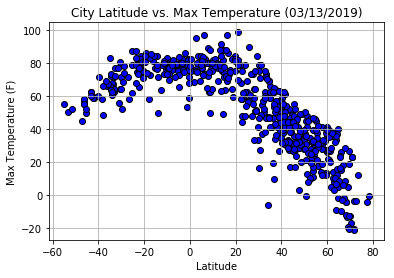

In [84]:
#build LatvsTemp plot with function
my_plot("Lat","Max Temp")

#### Latitude vs. Humidity Plot

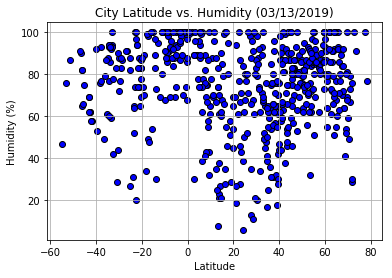

In [85]:
#build LatvsHumidity plot with function
my_plot("Lat","Humidity")

#### Latitude vs. Cloudiness Plot

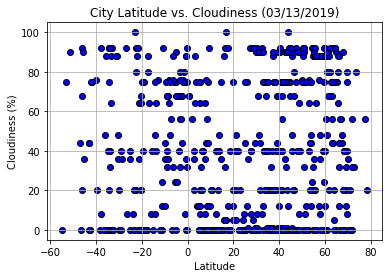

In [86]:
#build LatvsCloudiness Plot with function
my_plot("Lat","Cloudiness")

#### Latitude vs. Wind Speed Plot

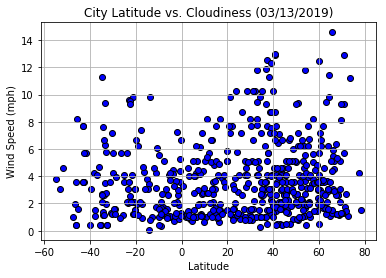

In [87]:
#build LatvsWindspeed plot with function
my_plot("Lat", "Wind Speed")